In [1]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
from glob import glob
import tensorflow as tf

In [3]:

# command line argument
ap = argparse.ArgumentParser()
# ap.add_argument("--mode", default='train', help="train/display")
mode = 'train'

# plots accuracy and loss curves
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [4]:
plot_model_history(model)

NameError: name 'model' is not defined

In [5]:

# Define data generators
train_dir = 'src/data/train'
val_dir = 'src/data/test'

num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 50

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


Epoch 1/50
448/448 [==============================] - 8s 16ms/step - loss: 1.8397 - accuracy: 0.2428 - val_loss: 1.8248 - val_accuracy: 0.2472
Epoch 2/50
448/448 [==============================] - 7s 16ms/step - loss: 1.8138 - accuracy: 0.2472 - val_loss: 1.7842 - val_accuracy: 0.2626
Epoch 3/50
448/448 [==============================] - 7s 16ms/step - loss: 1.7738 - accuracy: 0.2610 - val_loss: 1.6627 - val_accuracy: 0.3523
Epoch 4/50
448/448 [==============================] - 7s 16ms/step - loss: 1.6598 - accuracy: 0.3428 - val_loss: 1.5554 - val_accuracy: 0.4058
Epoch 5/50
448/448 [==============================] - 7s 16ms/step - loss: 1.5635 - accuracy: 0.3954 - val_loss: 1.4968 - val_accuracy: 0.4270
Epoch 6/50
448/448 [==============================] - 7s 16ms/step - loss: 1.5176 - accuracy: 0.4141 - val_loss: 1.4563 - val_accuracy: 0.4371
Epoch 7/50
448/448 [==============================] - 7s 16ms/step - loss: 1.4691 - accuracy: 0.4335 - val_loss: 1.4224 - val_accuracy: 0.4554

<ipython-input-3-a2164cfb0c15>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-3-a2164cfb0c15>:26: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


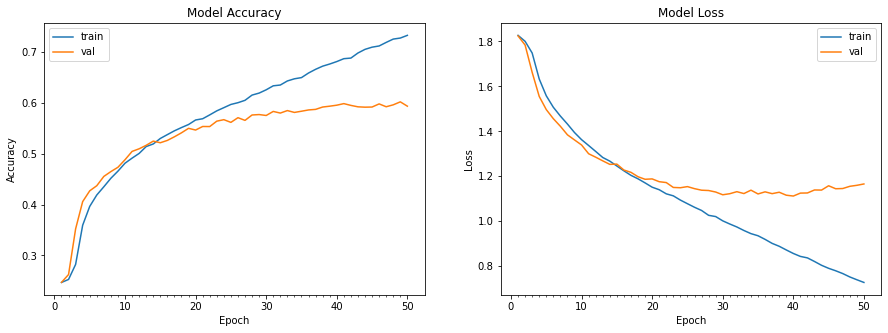

In [10]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
model_info = model.fit_generator(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size)
plot_model_history(model_info)
model.save_weights('model.h5')

In [23]:
# files

In [22]:
model.load_weights('model.h5')

# prevents openCL usage and unnecessary logging messages
cv2.ocl.setUseOpenCL(False)

# dictionary which assigns each label an emotion (alphabetical order)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# start the webcam feed
# cap = cv2.VideoCapture(0)
files = glob('../../recommendation/images/*')
for file in files:
    frame = cv2.imread(file)
    # Find haar cascade to draw bounding box around face
#     ret, frame = cap.read()
#     if not ret:
#         break
    facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        print('{} => {}'.format(os.path.basename(file), emotion_dict[maxindex]))
#         cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

#     cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break


chathuranga_22_male_1.png => Neutral
ishen_15_m_2.png => Surprised
chathuranga_22_male_2.png => Neutral
sadula_22_male_2.png => Neutral
shenal_21_Male_1.png => Angry
Sajith_28_male_2.png => Happy
mithun_6_m_1.png => Happy
dilini_39_Female_1.png => Fearful
Jerry_24_male_2.png => Neutral
Harison_87_m_2.png => Fearful
Dulanjani_1.png => Angry
Koshana_23_Male_1.png => Neutral
Yashmitha_23_Female_2.png => Neutral
Numaya_23_Female_2.png => Happy
Dulmini_23__female_2.png => Happy
Ravindu_27_Male_1.png => Neutral
Meth_11_male_2.png => Neutral
Ravindu_23_male_2.png => Surprised
Thisal 1_22_male_1.png => Surprised
Ramesha_15_f_1.png => Neutral
Venura_23_male_1.png => Angry
medhavi_25_female_2.png => Happy
Chamath_24_male_2.png => Happy
sankalpa_21_male_2.png => Neutral
Samadhi_23_female_2.png => Happy
nalika_54_female_2.png => Sad
Thathsarani_24_f_2.png => Surprised
Yomal_22_male_2.png => Fearful
Deshani_24_f_1.png => Sad
Ridmie_22_female_1.png => Happy
Rithma_22_Female_1.png => Neutral
kalshan_

Thisal_22_male_2.png => Neutral
Ranula_24_M_1.png => Neutral
dewdun_15_m_1.png => Neutral
pubudu_23_male_2.png => Fearful
amana_14_female_1.png => Happy
Dulanjani_2.png => Angry
Anusha_56_f_1.png => Neutral
kaushalya_23_Female_2.png => Angry
Senura_24_Male_1.png => Sad
Himashi_23_female _1.png => Fearful
Chathupama_23_female_1.png => Happy
Vishwa_16_m_2.png => Angry
DImtharu_09_M_2.png => Happy
senura_15_m_2.png => Surprised
Jayasinghe_51_Female_1.png => Happy
Desilva_23_M_2.png => Angry
Dilith_24_Male_1.png => Surprised
Thushan_25_Male_1.png => Angry
Yehan_18_male_2.png => Neutral
Vishwa_16_m_1.png => Neutral
Buddhima4_21_male_1.png => Fearful
Supun_23_male_2.png => Neutral
Vinodya_22_female_2.png => Neutral
Supun_23_male_1.png => Sad
Anjana_95_Male_1.png => Neutral
kushani_20_female_2.png => Neutral
manuja_22_male_1.png => Neutral
ravindu_23_male_1.png => Surprised
chandula_24_female_2.png => Surprised
Sudesha_24_male_2.png => Fearful
Nethma_24_Female_1.png => Happy
Sanjana_20_male_2